In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np

In [2]:
%matplotlib inline

In [3]:
train = pd.read_csv('train_data.csv').set_index('PassengerId')
test = pd.read_csv('test_data.csv').set_index('PassengerId')

In [4]:
map_l = {'C' : 0, 'Q' : 1, 'S' : 2}

In [5]:
train = train.drop(['Ticket', 'Name', 'Cabin'], axis=1)
train.loc[:, 'Sex'] = train['Sex'].apply(lambda x: 0 if x == 'female' else 1)
train.loc[:, 'Embarked'] = train['Embarked'].map(map_l)

In [6]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,2.0
2,1,1,0,38.0,1,0,71.2833,0.0
3,1,3,0,26.0,0,0,7.9250,2.0
4,1,1,0,35.0,1,0,53.1000,2.0
5,0,3,1,35.0,0,0,8.0500,2.0


In [7]:
test = test.drop(['Ticket', 'Name', 'Cabin'], axis=1)
test.loc[:, 'Sex'] = test['Sex'].apply(lambda x: 0 if x == 'female' else 1)
test.loc[:, 'Embarked'] = test['Embarked'].map(map_l)
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
892,3,1,34.5,0,0,7.8292,1
893,3,0,47.0,1,0,7.0000,2
894,2,1,62.0,0,0,9.6875,1
895,3,1,27.0,0,0,8.6625,2
896,3,0,22.0,1,1,12.2875,2


In [8]:
test = test.fillna(test.median())
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null int64
dtypes: float64(2), int64(5)
memory usage: 26.1 KB


In [9]:
# maybe fillna with median (?)
train = train.fillna(train.median())

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null float64
dtypes: float64(3), int64(5)
memory usage: 62.6 KB


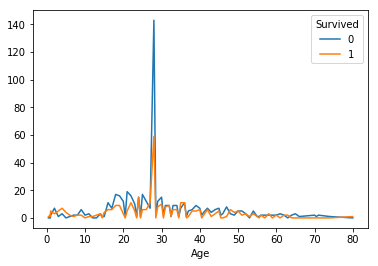

In [11]:
pd.crosstab(train['Age'], train['Survived']).plot()

c:\program files (x86)\python36-32\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


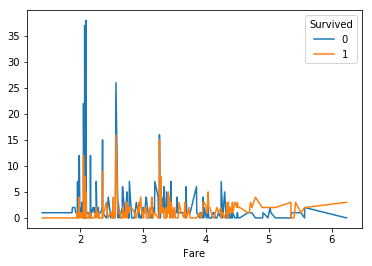

In [12]:
pd.crosstab(np.log(train['Fare']), train['Survived']).plot()

In [13]:
# train[train['Fare'] == 0]

In [19]:
train.loc[train['Fare'] != 0, 'Fare'] = np.log(train[train['Fare'] != 0]['Fare'])

In [20]:
# train.loc[train['Age'] <= 16, 'Sex'] = 2
# train.loc[train['Age'] >= 45, 'Sex'] = 3

In [21]:
train = train.join(pd.get_dummies(train['Pclass'])).drop('Pclass', axis=1)
test = test.join(pd.get_dummies(test['Pclass'])).drop('Pclass', axis=1)

In [22]:
train_label = train['Survived']
train_features = train.drop('Survived', axis=1)

In [23]:
train_features.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
PassengerId,,,,,,,,,
1,1,22.0,1,0,0.683603,2.0,0,0,1
2,0,38.0,1,0,1.450832,0.0,1,0,0
3,0,26.0,0,0,0.727559,2.0,0,0,1
4,0,35.0,1,0,1.379314,2.0,1,0,0
5,1,35.0,0,0,0.735091,2.0,0,0,1


In [24]:
# train_features[['Age',].plot()

In [25]:
clf = RandomForestClassifier(max_depth=6)

In [26]:
clf.fit(train_features, train_label)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
clf.feature_importances_

array([0.3750086 , 0.13265851, 0.03619423, 0.03419888, 0.21991702,
       0.03798607, 0.01123428, 0.02851345, 0.12428896])

In [28]:
train_features.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
PassengerId,,,,,,,,,
1,1,22.0,1,0,0.683603,2.0,0,0,1
2,0,38.0,1,0,1.450832,0.0,1,0,0
3,0,26.0,0,0,0.727559,2.0,0,0,1
4,0,35.0,1,0,1.379314,2.0,1,0,0
5,1,35.0,0,0,0.735091,2.0,0,0,1


In [29]:
clf.score(train_features, train_label)

0.8574635241301908

In [30]:
test.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,1,2,3
PassengerId,,,,,,,,,
892,1,34.5,0,0,7.8292,1,0,0,1
893,0,47.0,1,0,7.0000,2,0,0,1
894,1,62.0,0,0,9.6875,1,0,1,0
895,1,27.0,0,0,8.6625,2,0,0,1
896,0,22.0,1,1,12.2875,2,0,0,1


In [31]:
predicted = clf.predict(test)

In [32]:
answer = pd.DataFrame({  'PassengerId' : test.index,
                         'Survived' : predicted})

In [33]:
answer.to_csv('answer.csv', index=False)